### 1. Introduction










# Candy data set project based on Disision tree to predict whether the given product is a candy or a chocolate.

**Table of content:**

* Problem Statement
* Data Loading and Description
* Preprocessing
* Decision Tree
4.1 Introduction of Decision Tree
4.2 Important Terminology related to Decision Trees
4.3 Types of Decision Trees
4.4 Concept of Homogenity
4.5 How does a tree decide where to split?
4.5.1 Gini Index
4.5.2 Information Gain
4.6 Advantages of using Decision Tree
4.7 Shortcomings of Decision Trees
4.8 Preparing X and y using pandas
4.9 Splitting X and y into training and test datasets.
4.10 Decision Tree in scikit-learn
4.11 Using the Model for Prediction
* Model evaluation
5.1 Model Evaluation using accuracy score
5.2 Model Evaluation using confusion matrix
* Decision Tree with Gridsearch

### 2. Data Loading and Description










In [0]:
#### Importing packages                                          

In [0]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analys
### import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output


In [0]:
from __future__ import division, absolute_import, print_function


In [0]:
#### Importing the Dataset

candy_data = pd.read_csv("https://raw.githubusercontent.com/banduguide/URP_ML1/master/Candy_Data.csv")     # Importing training dataset using pd.read_csv

In [0]:
## 3. Preprocessing the data

In [37]:
candy_data.head ()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,one dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,one quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,air heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [38]:
candy_data.shape

(85, 13)

In [39]:
candy_data.describe

<bound method NDFrame.describe of                competitorname  chocolate  ...  pricepercent  winpercent
0                   100 grand          1  ...         0.860   66.971725
1                3 musketeers          1  ...         0.511   67.602936
2                    one dime          0  ...         0.116   32.261086
3                 one quarter          0  ...         0.511   46.116505
4                   air heads          0  ...         0.511   52.341465
..                        ...        ...  ...           ...         ...
80                  twizzlers          0  ...         0.116   45.466282
81                   warheads          0  ...         0.116   39.011898
82        welchs fruit snacks          0  ...         0.313   44.375519
83  werthers original caramel          0  ...         0.267   41.904308
84                   whoppers          1  ...         0.848   49.524113

[85 rows x 13 columns]>

In [40]:
candy_data.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

Text(0.5, 1, 'Correlation between features')

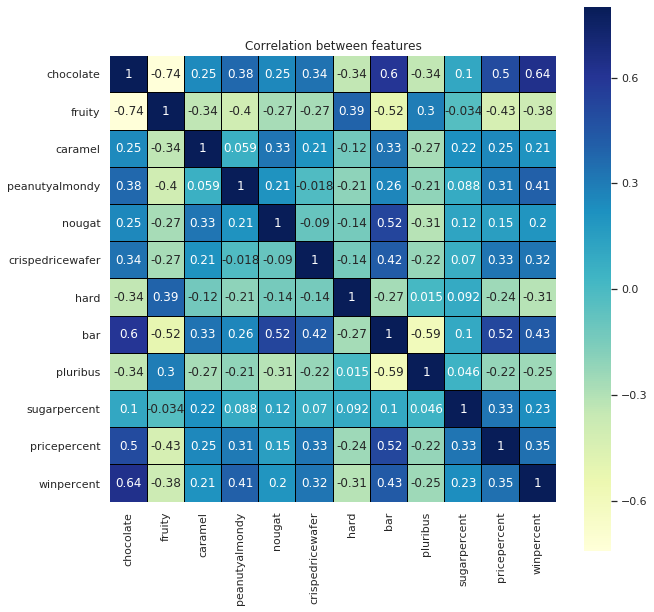

In [41]:
corr = candy_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

Observations:
1. fruity flaver is showing nagetive correlation with chocolate
2. fruity flaver is showing good correlation with pluribus and haed texture,that means good combination for candy.
3. caramel having negative correlation with fruity and hard texture
4. caramel having good combination with chocoalte,nouguts ,crispedrice waffers and bar
5. peanutyalmandy shows good correlation with chocolate,nouguts ,crispedrice waffers and bar
6.  peanutyalmandy shows negative correlation with candy type products.
7. crispedrice waffers shows good combination with chocolate ,caramel and bar.
8. crispedrice waffers shows nagative correlation with nougat,peanutyalmandy,fruity, pluribus,hard candy type material.
9. hard texture shows negative correlation with  chocoalte,nouguts ,crispedrice waffers and bar, peanutyalmandy,caramel
10. hard texture shows good combination with fruity flaver
11. chocolate shows high winpercentage

In [42]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)                                      # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(candy_data.chocolate,color="blue", ax=axes[0,0])
sns.distplot(candy_data.caramel,color="red", ax=axes[0,0)
sns.distplot(candy_data.nougats,color="green", ax=axes[0,0])
sns.distplot(candy_data.winprice,color="magenta", ax=axes[1,1])

SyntaxError: ignored

In [43]:
JG1 = sns.jointplot("chocolate","winprice", candy data=data, kind='scatterd')
JG2 = sns.jointplot("caramle", "winprice", data=candy_data, kind='reg')
JG3 = sns.jointplot("fruity", "winprice", data=candy_data, kind='reg')

#subplots migration
f = plt.figure()
for J in [JG1,JG2,JG3]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

SyntaxError: ignored

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


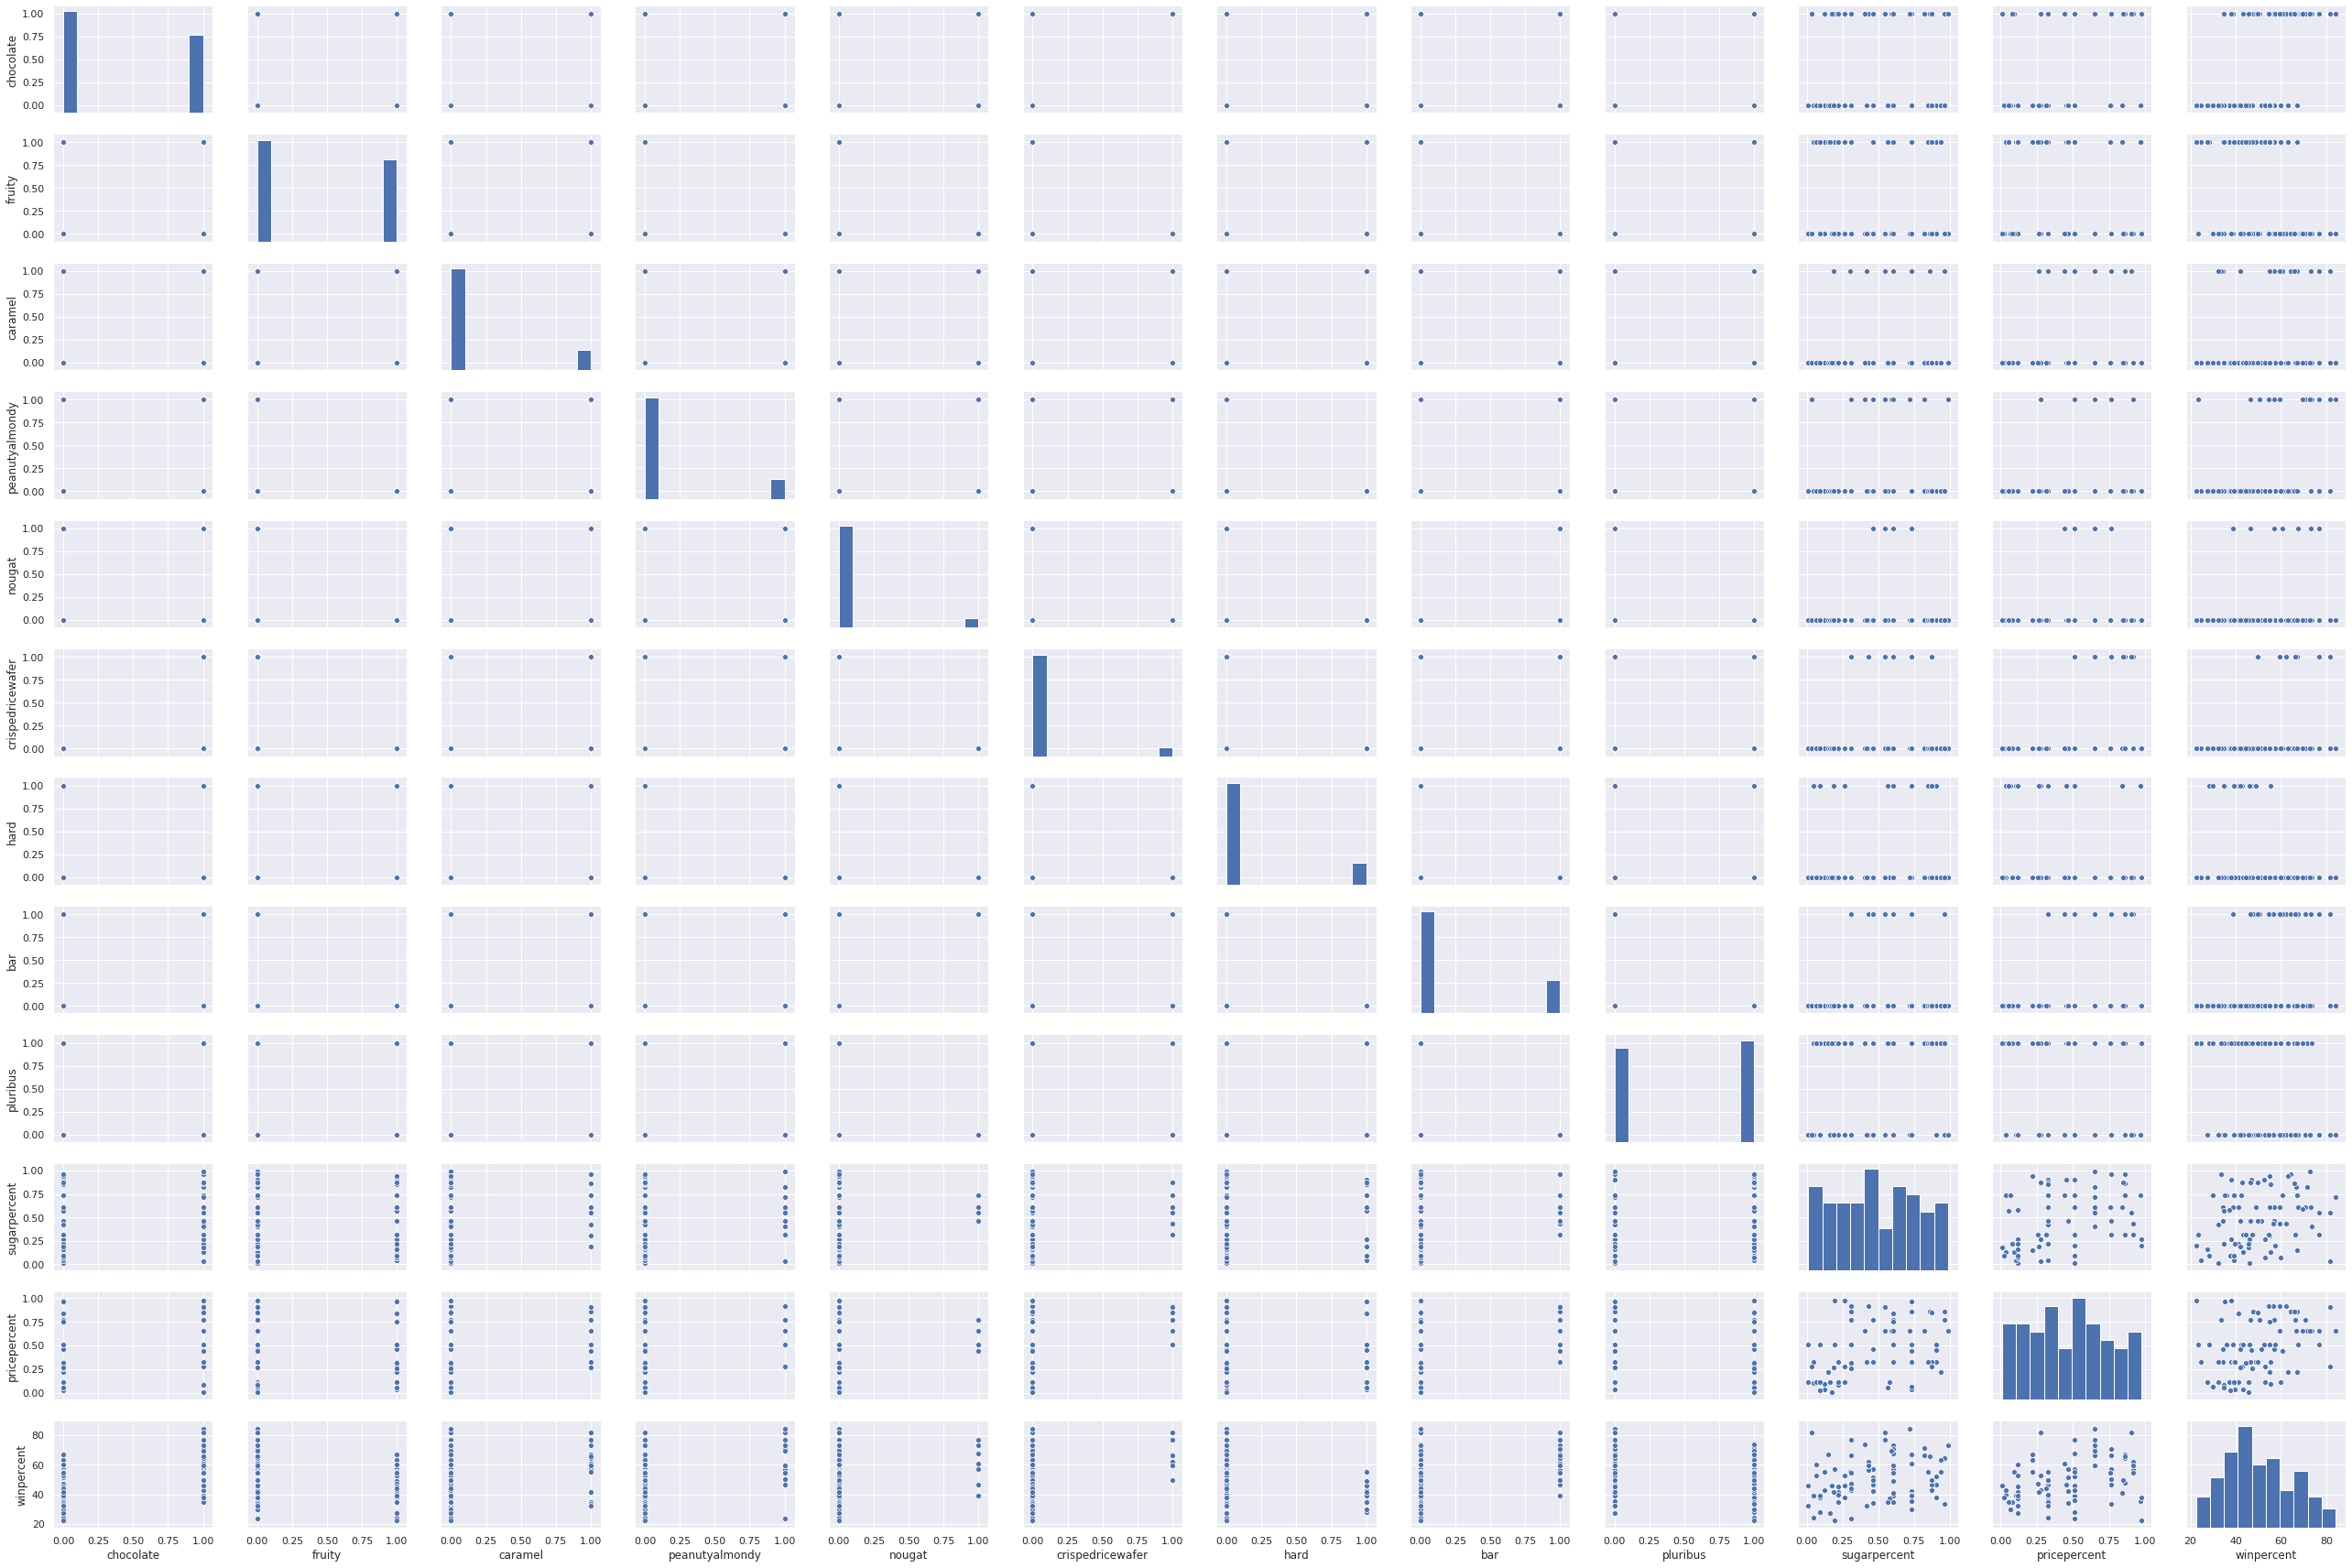

In [44]:
sns.pairplot(candy_data, size = 2, aspect = 1.5)


In [0]:
feature_cols = ['chocolate','fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent']                # create a Python list of feature names
X = candy_data[feature_cols]             # use the list to select a subset of the original DataFrame-+

In [46]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(85, 11)


In [47]:
Y = candy_data.winpercent
Y.head()

0    66.971725
1    67.602936
2    32.261086
3    46.116505
4    52.341465
Name: winpercent, dtype: float64

In [48]:
print(type(Y))
print(Y.shape)

<class 'pandas.core.series.Series'>
(85,)


In [0]:
candy_data.to_csv("datasump.csv")

In [0]:
from sklearn.model_selection import train_test_split

def split(X,Y):
    return train_test_split(X, Y, test_size=0.20, random_state=1)

In [51]:
X_train, X_test, Y_train, Y_test=split(X,Y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('Y_train shape: ',Y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('Y_test shape: ',Y_test.shape)

Train cases as below
X_train shape:  (68, 11)
Y_train shape:  (68,)

Test cases as below
X_test shape:  (17, 11)
Y_test shape:  (17,)


In [52]:
X_train.to_csv("datasump_xtrain.csv") 
X_test.to_csv("datasump_xtest.csv") 
Y_train.to_csv("datasump_ytrain.csv")
Y_test.to_csv("datasump_ytest.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


In [53]:
X_train

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
35,1,0,1,0,0,0,0,0,1,0.302,0.511
68,0,1,0,0,0,0,0,0,1,0.151,0.220
45,0,1,0,0,0,0,0,0,1,0.220,0.325
19,0,0,0,0,0,0,0,0,1,0.465,0.465
79,1,0,1,0,0,1,0,1,0,0.546,0.906
...,...,...,...,...,...,...,...,...,...,...,...
75,1,0,0,0,0,0,0,0,0,0.313,0.511
9,0,1,1,0,0,0,0,0,0,0.604,0.325
72,0,1,0,0,0,0,0,0,0,0.162,0.116
12,0,1,0,0,0,0,0,0,1,0.046,0.325


In [54]:
Y_test

38    64.353340
44    22.445341
27    57.219250
40    54.526451
36    73.099556
80    45.466282
58    42.849144
69    34.578991
84    49.524113
56    65.716286
67    52.825947
53    73.434990
48    37.722336
66    59.863998
63    45.995827
10    38.975037
2     32.261086
Name: winpercent, dtype: float64

In [55]:
X_test

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
38,1,0,1,0,0,0,0,1,0,0.965,0.860
44,0,1,0,0,0,0,0,0,1,0.197,0.976
27,1,0,0,0,0,0,0,0,1,0.197,0.511
40,1,0,0,1,0,0,0,1,0,0.313,0.918
36,1,0,1,0,1,0,0,1,0,0.604,0.651
80,0,1,0,0,0,0,0,0,0,0.220,0.116
58,0,1,0,0,0,0,1,0,1,0.872,0.279
69,0,1,0,0,0,0,1,0,1,0.569,0.058
84,1,0,0,0,0,1,0,0,1,0.872,0.848
56,1,0,1,0,0,0,0,0,1,0.860,0.860


In [56]:
Y_train

35    55.064072
68    67.037628
45    39.446800
19    34.158958
79    81.642914
        ...    
75    43.068897
9     34.517681
72    27.303865
12    24.524988
37    60.800701
Name: winpercent, Length: 68, dtype: float64

In [0]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [0]:
from sklearn import metrics

In [59]:
linreg.fit(X_train, Y_train)  # this is the trianing code. all learning is happening here\

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
X_test.shape

(17, 11)

In [61]:
Y_test.iloc[0]

64.35334

In [62]:
X_test.iloc[0]

chocolate           1.000
fruity              0.000
caramel             1.000
peanutyalmondy      0.000
nougat              0.000
crispedricewafer    0.000
hard                0.000
bar                 1.000
pluribus            0.000
sugarpercent        0.965
pricepercent        0.860
Name: 38, dtype: float64

In [63]:
[X_test.iloc[5]]

[chocolate           0.000
 fruity              1.000
 caramel             0.000
 peanutyalmondy      0.000
 nougat              0.000
 crispedricewafer    0.000
 hard                0.000
 bar                 0.000
 pluribus            0.000
 sugarpercent        0.220
 pricepercent        0.116
 Name: 80, dtype: float64]

In [64]:
linreg.predict([X_test.iloc[5]])

array([44.61303163])

In [65]:
Y_test.iloc[0]

64.35334

In [0]:
Y_pred = linreg.predict([X_test.iloc[5]])

In [67]:
Y_pred

array([44.61303163])

In [68]:
X_test.iloc[0]

chocolate           1.000
fruity              0.000
caramel             1.000
peanutyalmondy      0.000
nougat              0.000
crispedricewafer    0.000
hard                0.000
bar                 1.000
pluribus            0.000
sugarpercent        0.965
pricepercent        0.860
Name: 38, dtype: float64

In [69]:
linreg.predict([X_test.iloc[1]])


array([40.86918101])

In [70]:
Y_pred - Y_test.iloc[1]

array([22.16769063])

In [71]:
X_test.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
38,1,0,1,0,0,0,0,1,0,0.965,0.860
44,0,1,0,0,0,0,0,0,1,0.197,0.976
27,1,0,0,0,0,0,0,0,1,0.197,0.511
40,1,0,0,1,0,0,0,1,0,0.313,0.918
36,1,0,1,0,1,0,0,1,0,0.604,0.651


In [72]:
linreg.predict(X_test) 

array([55.10908166, 40.86918101, 52.10260665, 59.64778761, 59.07660229,
       44.61303163, 42.79443834, 39.50039241, 75.55900291, 55.82762664,
       40.0692605 , 62.83637085, 32.36419277, 40.0692605 , 36.00247316,
       62.77123871, 34.17200198])

In [73]:
Y_pred_test = linreg.predict(X_test) 
RMSE_test = (metrics.mean_squared_error(Y_test,Y_pred_test))                          # compute the RMSE of our predictions
print('RMSE for the test set is {}'.format(RMSE_test))

RMSE for the test set is 167.05181735247982


In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(pd.DataFrame(Y_test))
scaler.transform(pd.DataFrame(Y_test))

array([[ 1.01350951],
       [-1.95611498],
       [ 0.50798386],
       [ 0.31717061],
       [ 1.63327132],
       [-0.32483809],
       [-0.51028997],
       [-1.09631768],
       [-0.03729789],
       [ 1.11008864],
       [ 0.19667193],
       [ 1.65704036],
       [-0.87357848],
       [ 0.6953922 ],
       [-0.28731423],
       [-0.78481138],
       [-1.26056574]])

In [76]:
Y_pred

array([44.61303163])

In [77]:
Y_test

38    64.353340
44    22.445341
27    57.219250
40    54.526451
36    73.099556
80    45.466282
58    42.849144
69    34.578991
84    49.524113
56    65.716286
67    52.825947
53    73.434990
48    37.722336
66    59.863998
63    45.995827
10    38.975037
2     32.261086
Name: winpercent, dtype: float64

In [0]:
Y_pred --- Non Scaling 
Y_pred with Y_test --> Non_Scaled RMSE 


Added Parameter ---> Normalize=True 

if you plan to use scaling from Algorithm, don't scale before.
when you don't pass any parameters to algo, it means you are working on default/baseline model.

In [0]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [80]:
linreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=False, fit_intercept=False)
linreg.fit(X_train, Y_train) 
Y_pred_test = linreg.predict(X_test)   
# make predictions on the testing set
RMSE_test = (metrics.mean_squared_error(Y_test, Y_pred_test)) # compute the RMSE of our predictions
print('RMSE for the test set is {}'.format(RMSE_test))

RMSE for the test set is 311.782422697765


In [82]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=True)
linreg.fit(X_train, Y_train) 
Y_pred_test = linreg.predict(X_test)   
# make predictions on the testing set
RMSE_test = (metrics.mean_squared_error(Y_test, Y_pred_test)) # compute the RMSE of our predictions
print('RMSE for the test set is {}'.format(RMSE_test))

RMSE for the test set is 167.05181735247984


In [83]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=False)
linreg.fit(X_train, Y_train) 
Y_pred_test = linreg.predict(X_test)   
# make predictions on the testing set
RMSE_test = (metrics.mean_squared_error(Y_test, Y_pred_test)) # compute the RMSE of our predictions
print('RMSE for the test set is {}'.format(RMSE_test))

RMSE for the test set is 167.05181735247982


In [84]:
# This is after doing manual scaling. Make sure the X_train and Y_train gets scaled before sending to this function 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,Y_train) 
Y_pred_test = linreg.predict(X_test)   

                                                # make predictions on the testing set
RMSE_test = (metrics.mean_squared_error(Y_test, Y_pred_test))                          # compute the RMSE of our predictions
print('RMSE for the test set is {}'.format(RMSE_test))

RMSE for the test set is 167.05181735247982


# when gridsearch does the training, it create its own Train & Test. Make sure, wheever you do GridSearch, use random_seed 

In [85]:
from sklearn.model_selection import GridSearchCV

# define the parameters , it should always be a dictionary 
parameters = {'normalize':[True,False], 'copy_X':[True, False], 'fit_intercept':[True,False]}
linreg = LinearRegression() # this the model on which i would want to experiment 

# Call the GridSearch Class, Pass the model and parameter 
linreg = GridSearchCV(linreg,parameters)


linreg.fit(X_train, Y_train)                                                           # fit the model to the training data (learn the coefficients)
#, So internal Train test get created on this X_Train & Y_Train 80,20% 
# So, it creates new 80,20 split from the previous(global) 80% 

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

# This best_scaore_ gives you the RMSE of internal Train Test set of GridSearch 

# always fight for best stable model and not accurate model. -> Real World/Depolyment Prospective 

In [86]:
print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
# Of the internal Test set which is created out of 80% 

Mean cross-validated score of the best_estimator :  0.2881236105975919


In [87]:
linreg.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [88]:
linreg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
linreg.fit(X_train, Y_train)
Y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

RMSE_test = (metrics.mean_squared_error(Y_test, Y_pred_test))                          # compute the RMSE of our predictions
print('RMSE for the test set is {}'.format(RMSE_test))

RMSE for the test set is 167.05181735247984


### 4.5 Interpreting Model Coefficients

In [89]:
print('Intercept:',linreg.intercept_)                                           # print the intercept 
print('Coefficients:',linreg.coef_)

Intercept: 34.13574296847616
Coefficients: [18.92584064  8.05126009 -3.58659701  8.45203415  7.93401708 15.99830741
 -6.33077947 -4.73633764 -2.81719118 11.43430413 -0.77170981]


In [90]:
linreg.coef_

array([18.92584064,  8.05126009, -3.58659701,  8.45203415,  7.93401708,
       15.99830741, -6.33077947, -4.73633764, -2.81719118, 11.43430413,
       -0.77170981])

In [91]:
linreg.intercept_

34.13574296847616

In [0]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

In [93]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 34.13574296847616
chocolate 18.92584064484591
fruity 8.05126009012222
caramel -3.5865970139352044
peanutyalmondy 8.452034151853507
nougat 7.934017078848617
crispedricewafer 15.99830741233255
hard -6.33077946779993
bar -4.736337641899247
pluribus -2.8171911783408907
sugarpercent 11.434304133971015
pricepercent -0.7717098121223521


### 4.6 Using the Model for Prediction

In [0]:
Y_pred_train = linreg.predict(X_train)  

In [0]:
Y_pred_test = linreg.predict(X_test)   

## 5. Model evaluation 

### 5.1 Model Evaluation using __metrics.__

<a id=section405></a>

In [101]:
The difference between Train Accuracy and Test Accuracy should be least for a good Model
Train Accuracy. Y_train ~~ model.predict(X_train)


SyntaxError: ignored

In [0]:
MAE_train = metrics.mean_absolute_error(Y_train, Y_pred_train)
MAE_test = metrics.mean_absolute_error(Y_test, Y_pred_test)

In [98]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 7.638014059243085
MAE for test set is 10.464152742303979


In [0]:
MSE_train = metrics.mean_squared_error( Y_train, Y_pred_train)
MSE_test = metrics.mean_squared_error(Y_test, Y_pred_test)

In [0]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

In [0]:
# linear regression always work on numerical continuous. 
# the area column is categorical column - nonOrdinal 
  # possible solution -> you conver this to discreat numeircal ; 0,1,2, 
  # the actual solution is to convert numeical descrete to Dummy Variable 
  # Categrical (single col) --> Numerical Discreate (single col) --> Dummy Variable (which projects the categories into axis of vector space) (multiple col)
  # For N Categories, N columns will be created in Dummies. You always need N-1 columns to represent whole data
  # If the inference is important, Use N columns rather than N-1.
  # by default, always do N columns in Dummy. 


  # the data sent to model should always be constint: 
     # The data type representation should be same - either all should be numerical cont, or all should be category ?
     # If it is numerical cont, then make sure that they are scaled.  
     # Goal is to to convert all data types to Numerical cont: 
        # String cateogry -> get_dummies 
        # numerical discreate --> get_dummies [peopel are always confused on this; 
                  #we call something as discreate, when the unique of that column is way lesser than total values; uniq(col1)<<<<<total values (col)]
     # Goal is to convert everything to category:  (Don't do this for LR)
        # Numerical Cont data --> You take ranges (bins)  and create groups 
        # pd.cut(data['Sales'], bins=6)

In [103]:
np.random.seed(123456)                                                # set a seed for reproducibility
nums = np.random.rand(len(candy_data))
mask_chocolate = (nums > 0.33) & (nums < 0.66)                         # assign roughly one third of observations to each group
mask_candy= nums > 0.66
data['type'] = 'chocolate'
data.loc[mask_chocolate, 'type'] = 'chocolate'
data.loc[mask_candy, 'type'] = 'candy'
data.head()

NameError: ignored